# CS541: Applied Machine Learning, Fall 2024, Lab 5

Lab 5 is an exercise that explores Gaussian Mixture Models (GMM) which is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters.
They are flexible can model elliptical clusters, making them suitable for data with varying cluster shapes and sizes.

We will be working on creating a GMM from scratch and utilizing the
Expectation Likelihood algorithm to do this.


**Lab Grading**

Labs are hands-on exercises designed to provide guided experience in key concepts through this class.  You are graded based on in-lab participation (not correctness), and are not required to submit your lab if you attend in-person.  *Make sure you fill out the attendence form before leaving class*.

For students who miss a lab, you can submit a make-up lab on gradescope by the Friday directly following the lab for partial credit.  Please see the syllabus for the lab grading policy.

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn import datasets

class GMM:
    def __init__(self, k, max_iter=5):
        self.k = k #number of components (think of the number of classes you want to predict)
        self.max_iter = int(max_iter) #How many times do you want your algorithm to run to cluster the data

    def initialize(self, X):
        # set it as the shape of the numpy array of X
        self.shape =
        # n has the number of rows while m has the number of columns of dataset X
        self.n, self.m =


        # initial weights given to each cluster are stored in phi or P(Ci=j),
        #Lets make an array of size k and fill all the values with the value 1/self.k
        self.phi =


        # initial weights given to each data point wrt to each cluster or P(Xi/Ci=j)
        #Lets make an array of size self.shape and fill all the values with the value 1/self.k
        self.weights =

        # dataset is divided randomly into k parts of unequal sizes
        # Create an array of random ints with a low of 0 and a high of self.n, and the size is self.k
        random_row =

        # initial value of mean of k Gaussians
        # Let's make a list that takes in all the rows in X that correspond to the rows from random_row
        self.mu =

        # initial value of covariance matrix of k Gaussians
        # We want to get the covariance of k gaussians you can use numpy's built in function for this, and consider transposing your X array
        # before getting the covariance
        self.sigma = []

    # E-Step: update weights and phi holding mu and sigma constant
    def e_step(self, X):
        # updated weights or P(Xi/Ci=j)
        self.weights = self.predict_proba(X)
        # mean of the sum of the probability of all data points wrt to one cluster is the newly updated probability of cluster k or (phi)k
        # consider getting the mean of the self.weights across the rows
        self.phi =

    # M-Step: update meu and sigma holding phi and weights constant
    def m_step(self, X):
        for i in range(self.k):
            weight = self.weights[:, [i]]

            #Lets get the sum of the weights
            total_weight =

            # Now let's multiply X by the weight, and sum along the rows, and we divide this all by the total weight
            self.mu[i] =

            vector_weights = (weight/total_weight).flatten()

            # Calculate the covariance of sigma[i] using the vector weights
            self.sigma[i] = np.cov(X.T,aweights=, bias=True)




    # predicts probability of each data point wrt each cluster
    def predict_proba(self, X):
        # Creates a n*k matrix denoting probability of each point wrt each cluster
        # Let's first create a dummy array filled with zeros of size n*k
        likelihood =
        for i in range(self.k):
            #Use the multivariate_normal function from scipy and set the mean to the self.m at the i'th and self.sigma also at the i'th cluster
            distribution = multivariate_normal(mean=self.,cov=self.)

            # pdf : probability denisty function
            # Use the distribution we just defined and use the pdf function from it and pass the X value to it
            # You can read about the multivariate_normal function from scipy and you can see what methods you can call
            likelihood[:,i] =

        # Now you want to multiply the likelihood by the self.phi attribute we defined previously
        numerator =

        # Currently we are summing along the columns, we also want to utilize np.newaxis
        # on the result, let's use it to increase the dimension by 1, e.g. var[:, np.newaxis]
        denominator = numerator.sum(axis=1)[]

        # Now simply divide the numerator by the denominator!
        weights =
        return weights

    # predict function
    def predict(self, X):
        weights = self.predict_proba(X)
        # datapoint belongs to cluster with maximum probability
        # returns this value
        return np.argmax(weights, axis=1)


    # responsible for clustering the data points correctly
    def fit(self, X,y):
        # initialise parameters like weights, phi, meu, sigma of all Gaussians in dataset X
        self.initialize(X)
        plt.figure(figsize=(16, 25))
        for iteration in range(self.max_iter):
            permutation = np.array([mode(y[gmm.predict(X) == i]).mode.item() for i in range(gmm.k)])
            permuted_prediction = permutation[gmm.predict(X)]
            print('\nThe accuracy of the permuted prediction against target before iteration ',iteration+1,end="")
            print(': ',np.mean(y == permuted_prediction))
            print('\n')
            confusion_matrix(y, permuted_prediction)
            plt.title(' Iteration Cluster')
            plt.subplot(5,3,iteration+1)
            clusters=permuted_prediction
            plt.xlabel('X[0]')
            plt.ylabel('X[1]')
            plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
            plt.grid()
            plt.tight_layout()
            # iterate to update the value of P(Xi/Ci=j) and (phi)k
            self.e_step(X)
            # iterate to update the value of meu and sigma as the clusters shift
            self.m_step(X)

In [ ]:
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
def jitter(x):
    return x + np.random.uniform(low=-0.05, high=0.05, size=x.shape)

def plot_axis_pairs(X, axis_pairs, clusters, classes):
    n_rows = len(axis_pairs) // 2
    n_cols = 2
    plt.figure(figsize=(16, 10))
    # iterates through all the plots
    for index, (x_axis, y_axis) in enumerate(axis_pairs):
        plt.subplot(n_rows, n_cols, index+1)
        plt.title('Final Cluster',fontsize=26)
        plt.xlabel('X[0]')
        plt.ylabel('X[1]')
        plt.scatter(jitter(X[:, x_axis]), jitter(X[:, y_axis]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
        plt.grid()
        plt.tight_layout()

(1000, 2)


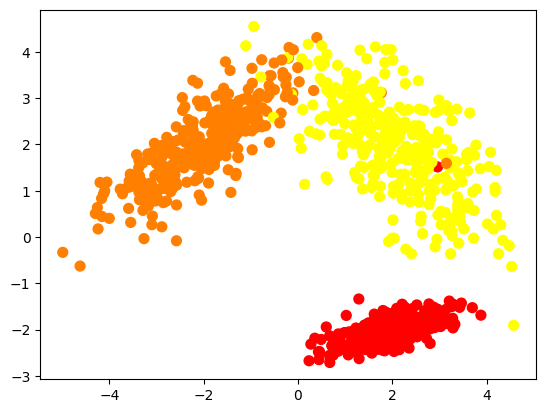

In [ ]:
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_classes=3,
                                     n_clusters_per_class=1, n_redundant=0,class_sep=2,
                                     random_state=43)
print(X.shape)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');


The accuracy of the permuted prediction against target before iteration  1:  0.664




<ipython-input-4-e5eb8b07a5fa>:97: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3,iteration+1)
<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  2:  0.665




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  3:  0.665



The accuracy of the permuted prediction against target before iteration  4:  0.665




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  5:  0.838




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  6:  0.849




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  7:  0.873




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  8:  0.888




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  9:  0.914




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  10:  0.942




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  11:  0.959




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  12:  0.971




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  13:  0.98




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  14:  0.984




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  15:  0.985




<ipython-input-4-e5eb8b07a5fa>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')


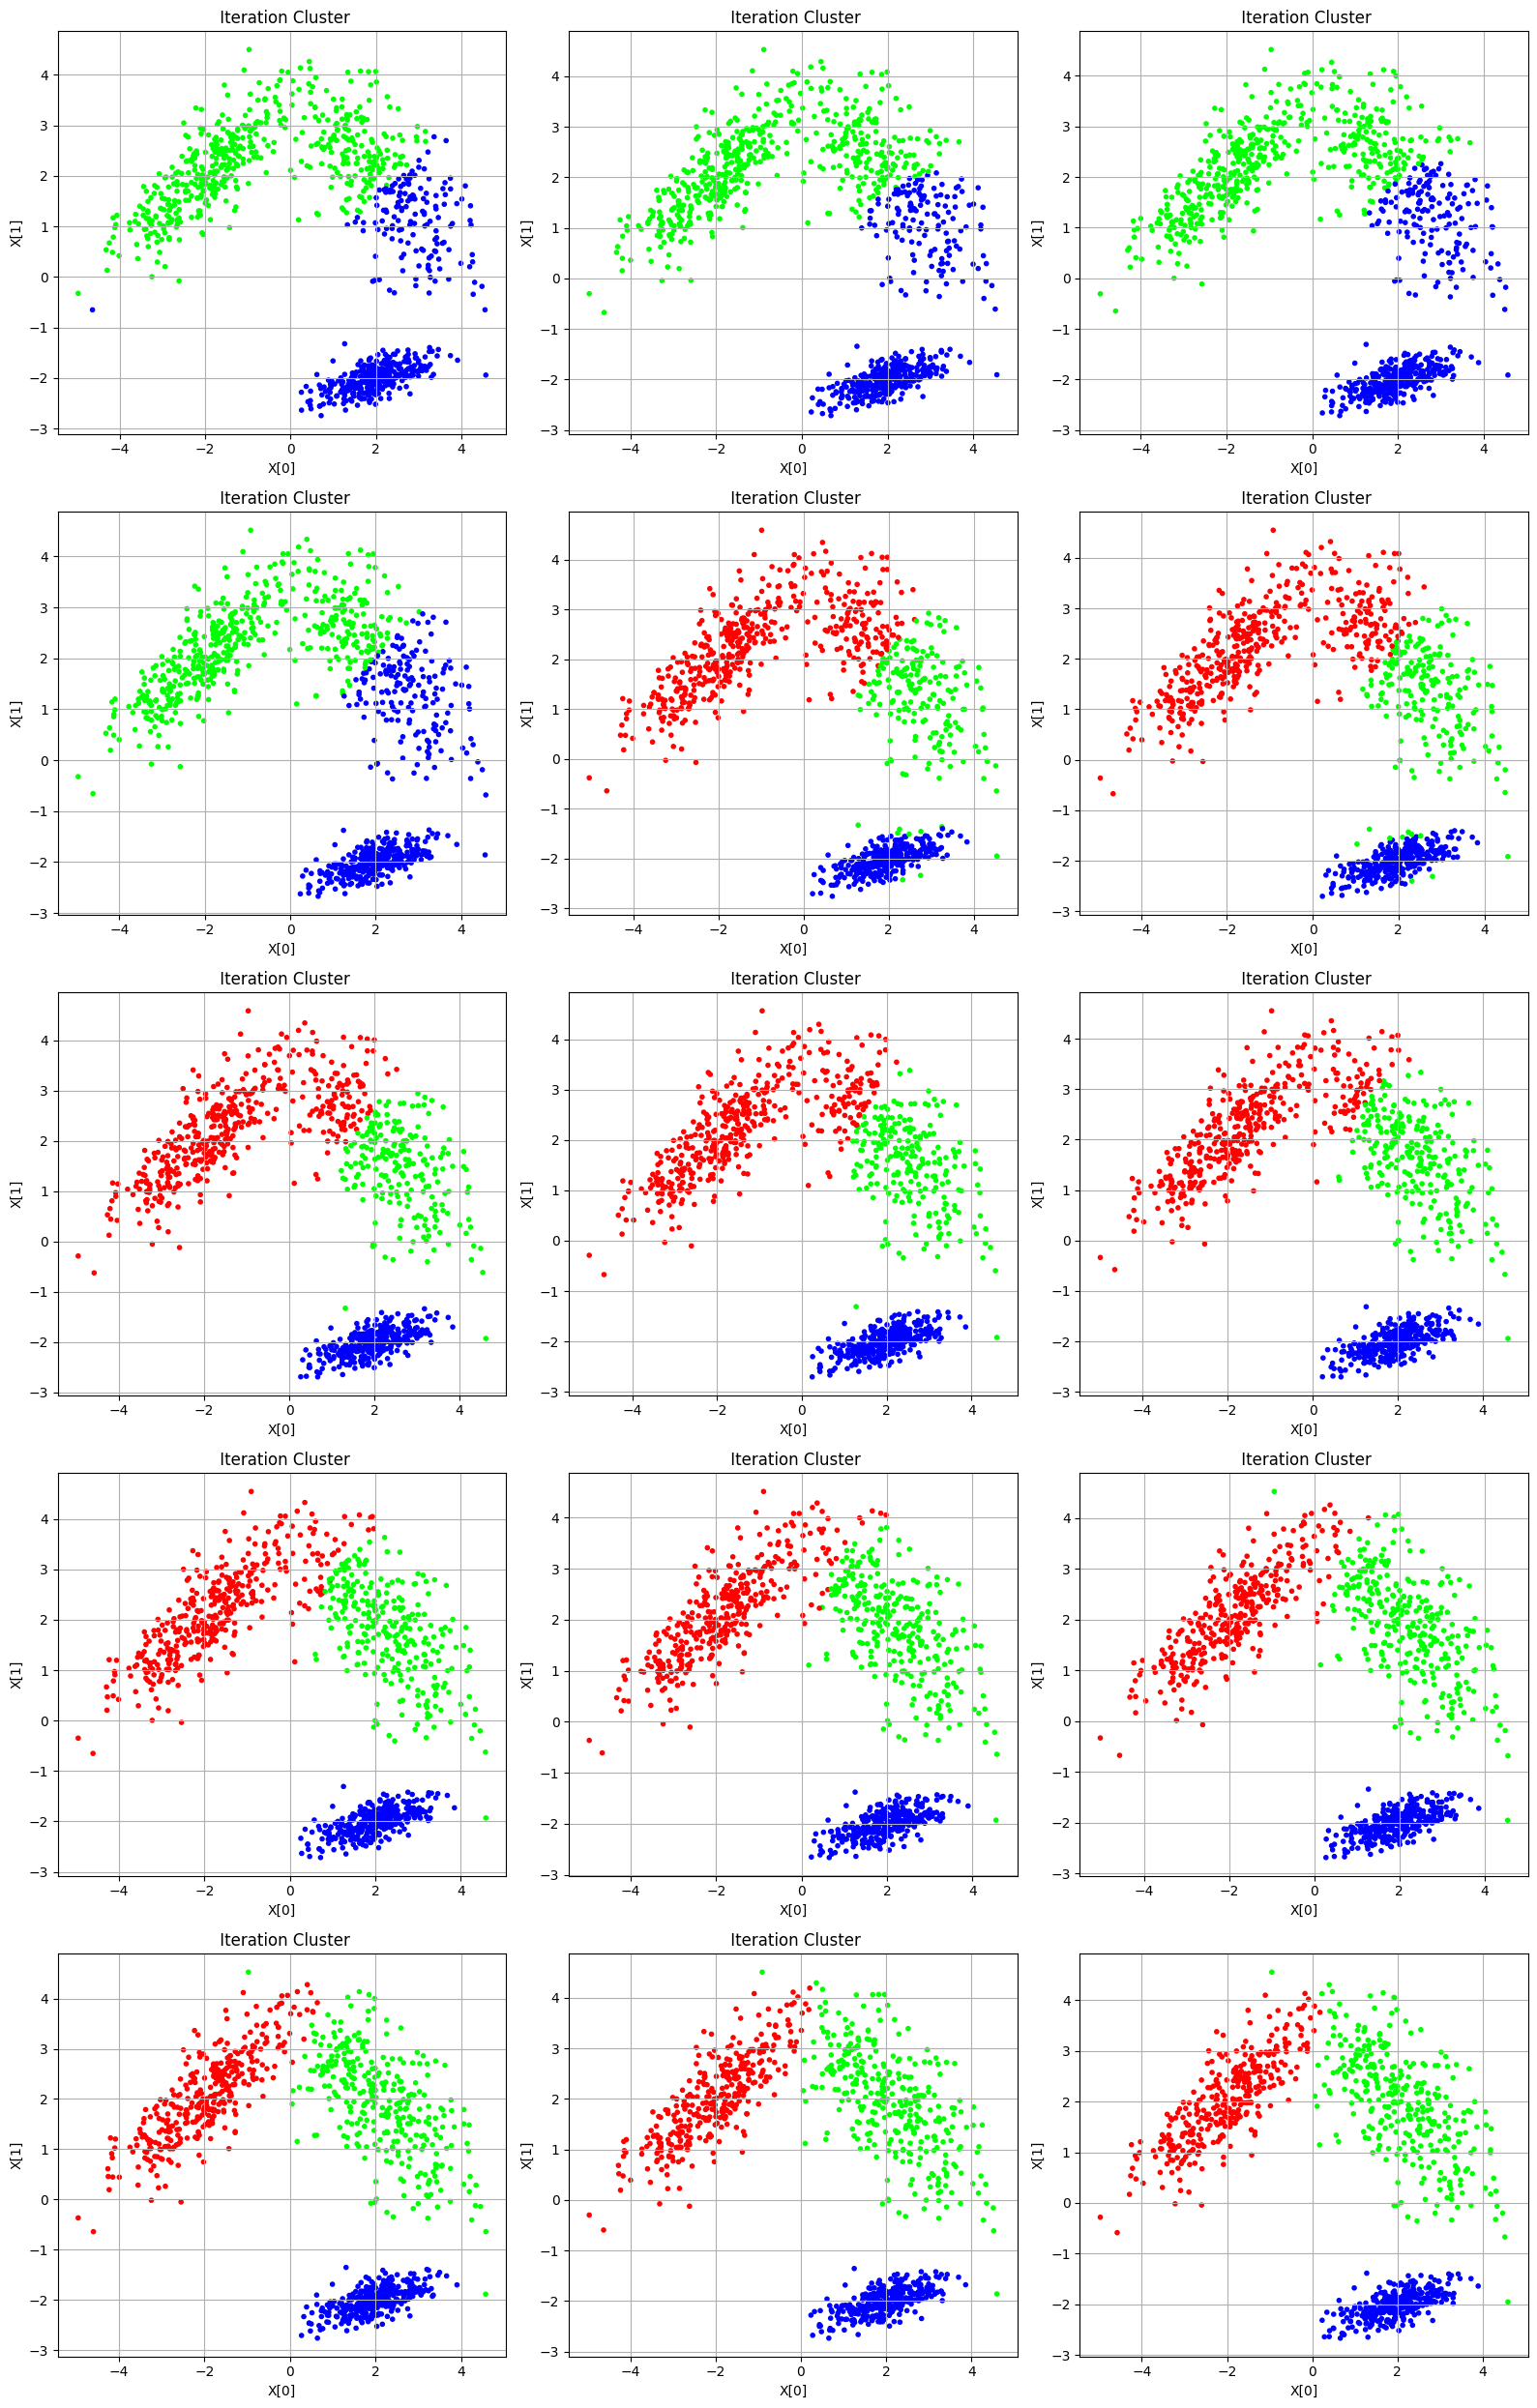

In [ ]:
np.random.seed(42)
#gmm = GMM(k=3, max_iter=14)
gmm = GMM(k=3, max_iter=15)
#gmm = GMM(k=3, max_iter=1)
gmm.fit(X,y)

In [ ]:

from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data



# convert numpy array to DataFrame
import pandas as pd
Y = pd.DataFrame(X, columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width'])
Y.head()

(150, 4)

The accuracy of the permuted prediction against target before iteration  1:  0.6266666666666667



The accuracy of the permuted prediction against target before iteration  2:  0.68




<ipython-input-32-ecf922b8aacc>:97: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,3,iteration+1)
<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  3:  0.7866666666666666



The accuracy of the permuted prediction against target before iteration  4:  0.8533333333333334




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  5:  0.86



The accuracy of the permuted prediction against target before iteration  6:  0.8733333333333333




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')
<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  7:  0.8866666666666667




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  8:  0.9




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  9:  0.9466666666666667




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  10:  0.9733333333333334




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  11:  0.96




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  12:  0.9533333333333334




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  13:  0.9666666666666667




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')



The accuracy of the permuted prediction against target before iteration  14:  0.9666666666666667




<ipython-input-32-ecf922b8aacc>:101: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(jitter(X[:, 0]), jitter(X[:, 1]), c=clusters, cmap=plt.cm.get_cmap('brg'),marker='.')


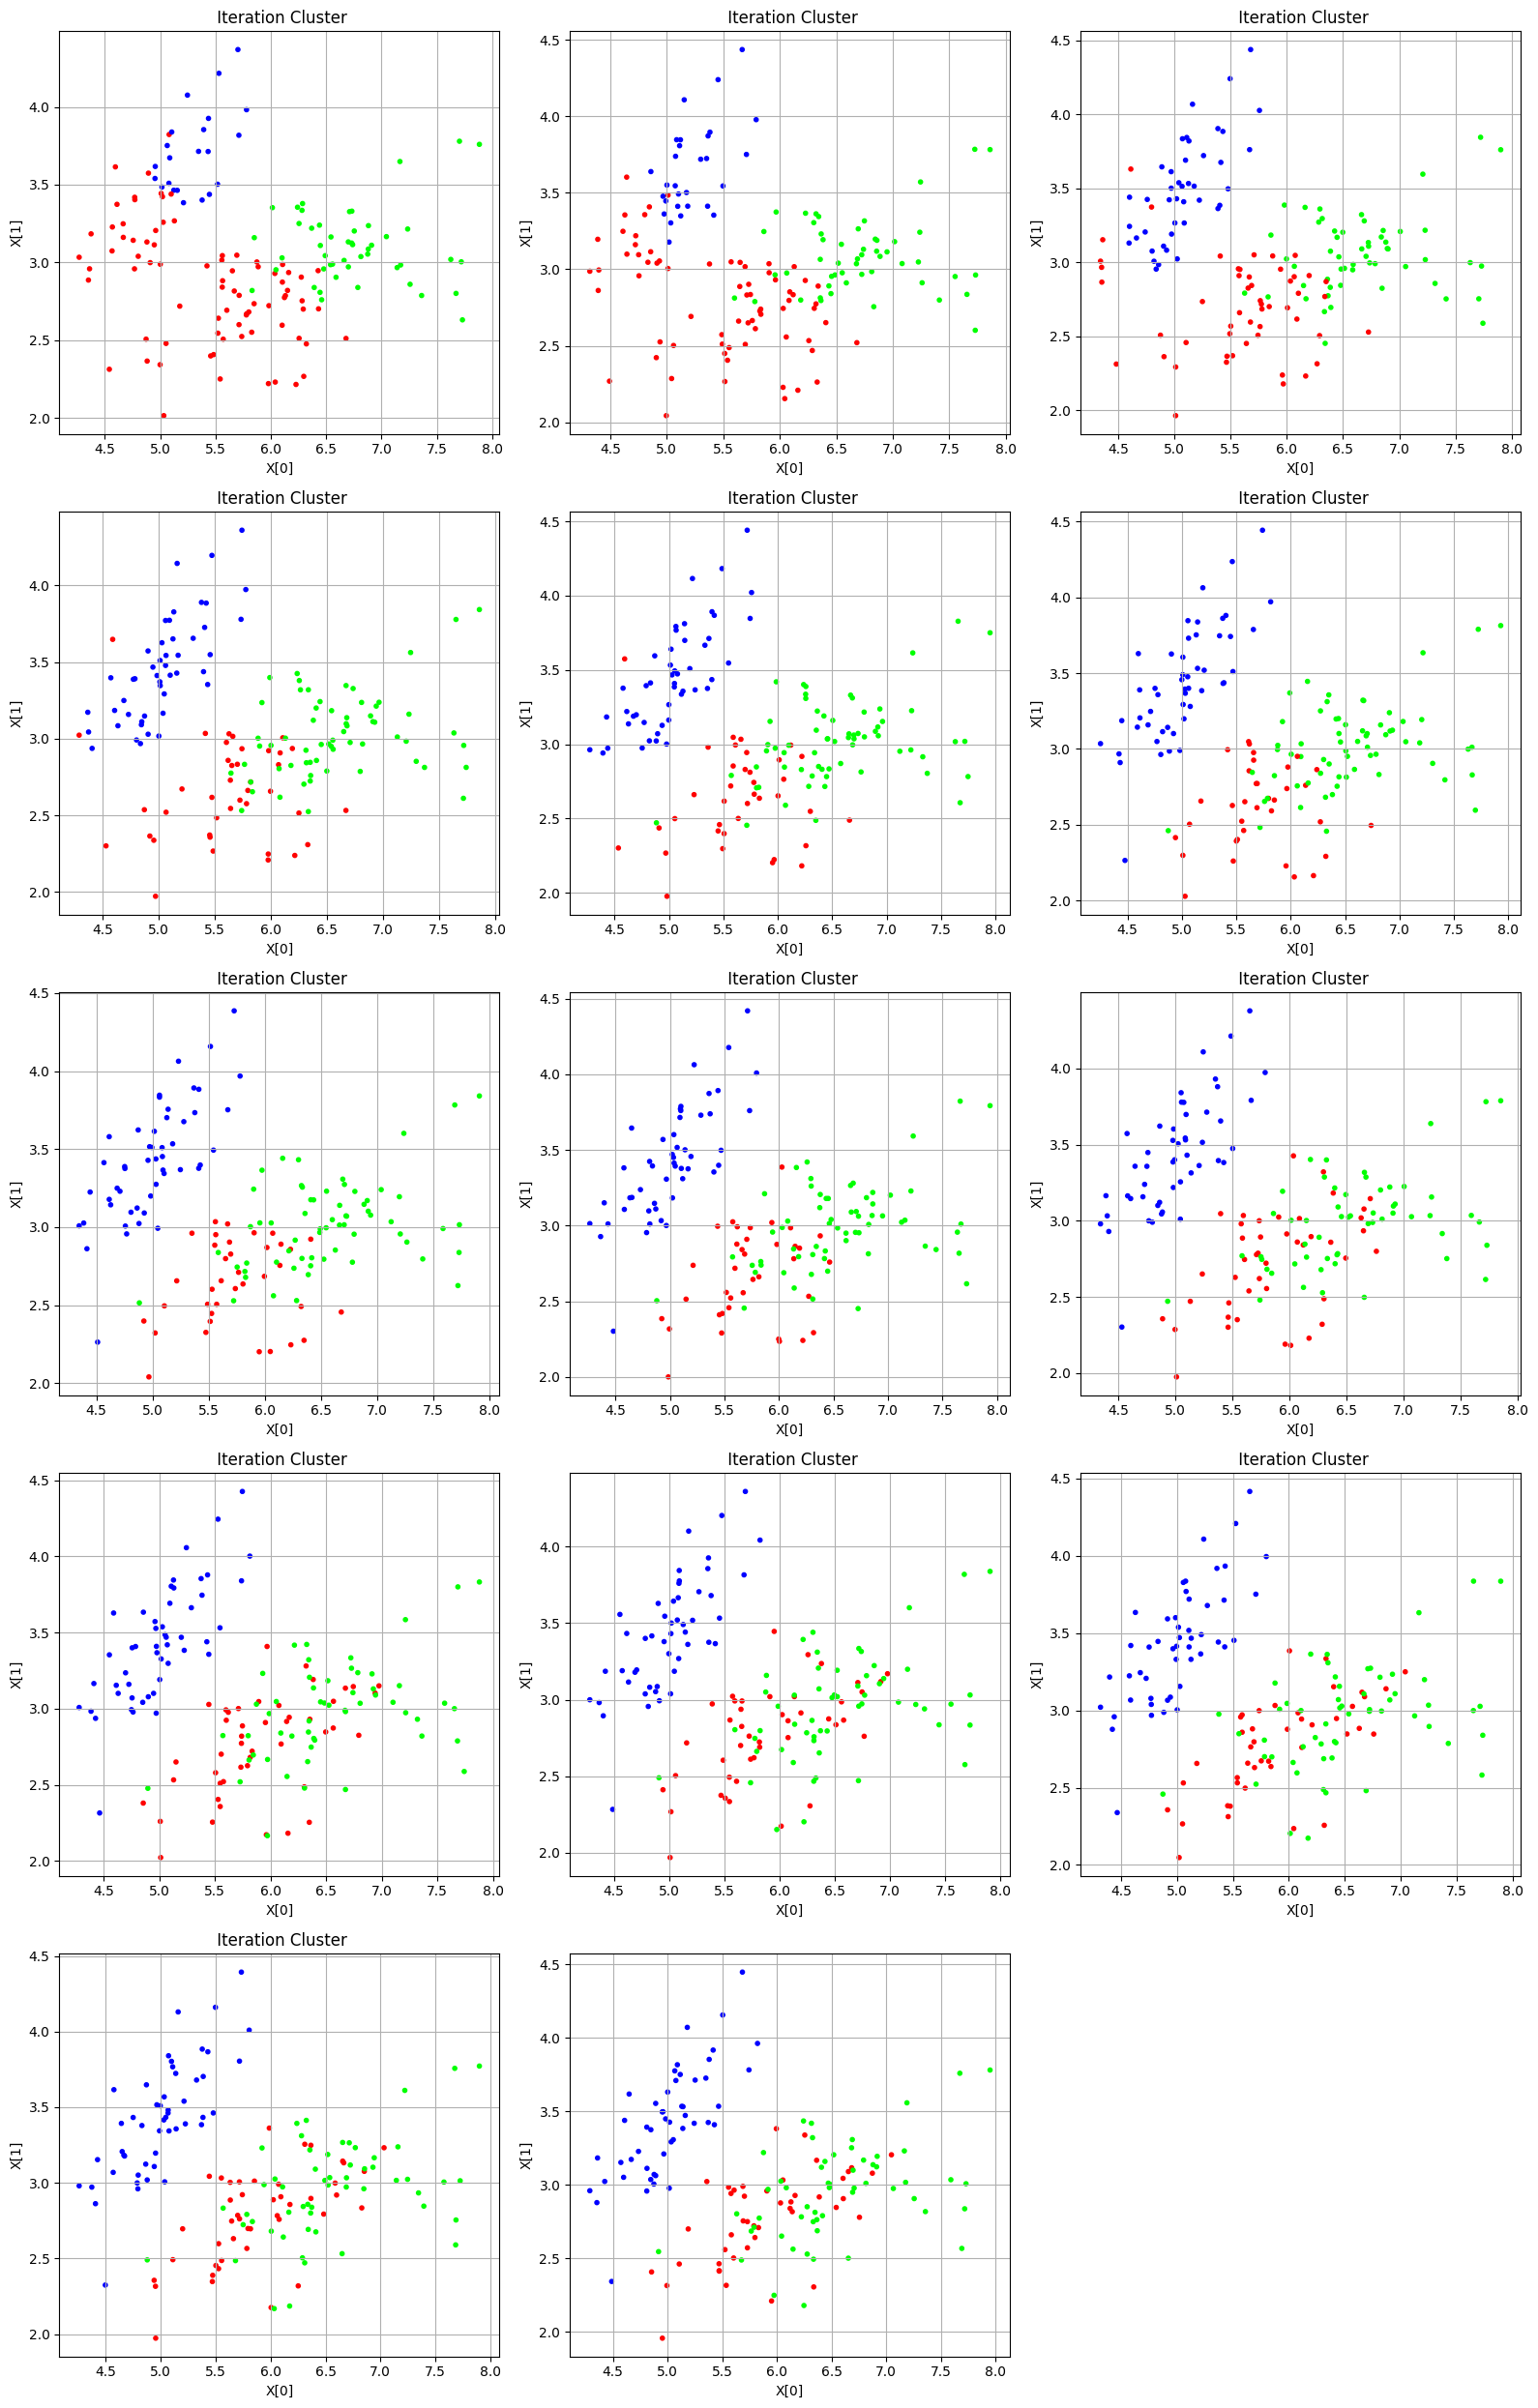

In [ ]:
np.random.seed(42)
# You will need to adapt your code to account for the output variable Y
# Potentially look at where the y variable is called, and how is that different for you iris dataset
gmm = GMM_iris(k=3, max_iter=14)
gmm.fit(X)